<a href="https://colab.research.google.com/github/21pa1a6128/DWM-lab/blob/main/operations_on_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/drive/MyDrive/students_placement_data.csv')

In [4]:
#Q1 basic characteristics of the data
df.describe()

,Roll No,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs
count,117.000000,116.000000,117.000000,116.000000,117.000000
mean,59.000000,80.153362,80.535299,62.662672,4.111111
std,33.919021,9.462320,11.818567,12.591167,6.335148
min,1.000000,44.000000,40.200000,21.200000,0.000000
25%,30.000000,75.875000,73.400000,54.175000,0.000000
50%,59.000000,82.745000,83.600000,63.885000,0.000000
75%,88.000000,87.025000,90.000000,72.570000,7.000000
max,117.000000,93.660000,96.900000,88.100000,25.000000


In [5]:
# Q2 check if there is any missing value in datasdets
df.isna().any()

Roll No                               False
Gender                                False
Section                               False
SSC Percentage                         True
inter_Diploma_percentage              False
B.Tech_percentage                      True
Backlogs                              False
registered_for_ Placement_Training     True
placement status                      False
dtype: bool

In [18]:
#Q3 deal with na values
df['SSC Percentage']=df['SSC Percentage'].fillna(np.mean(df['SSC Percentage']))
df['B.Tech_percentage']=df['B.Tech_percentage'].fillna(np.mean(df['B.Tech_percentage']))
df['registered_for_ Placement_Training']=df['registered_for_ Placement_Training'].fillna((df['registered_for_ Placement_Training'].mode()[0]))
df.head()

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.3,65.3,40.000000,18,NO,Not placed
1,2,F,A,89.0,92.4,21.200000,0,yes,Placed
2,3,F,A,67.0,40.2,62.662672,13,yes,Not placed
3,4,M,A,71.0,70.4,36.470000,17,yes,Not placed
4,5,M,A,44.0,65.5,42.520000,17,yes,Not placed


In [7]:
#Q4 find the mean of SCC Percentage
'the mean of scc percentage is :'+str(df['SSC Percentage'].mean())

'the mean of scc percentage is :80.15336206896552'

In [25]:
df.dtypes

Roll No                                 int64
Gender                                 object
Section                                object
SSC Percentage                        float64
inter_Diploma_percentage              float64
B.Tech_percentage                     float64
Backlogs                                int64
registered_for_ Placement_Training     object
placement status                       object
dtype: object

In [32]:
df['placement status'].value_counts()

Not placed    78
Placed        39
Name: placement status, dtype: int64

In [44]:
df['Gender'].value_counts().keys()

Index(['M', 'F'], dtype='object')

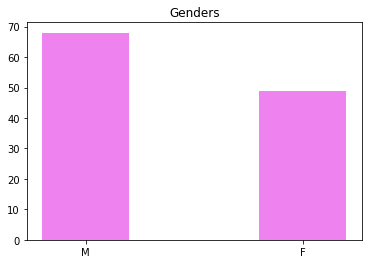

<Figure size 2.16e+08x432 with 0 Axes>

In [75]:
plt.bar(df['Gender'].value_counts().keys(),df['Gender'].value_counts(),color='violet',width=0.4)
plt.title('Genders')
plt.show()

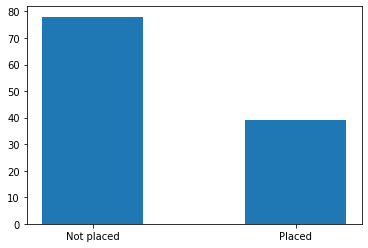

In [80]:
plt.bar(df['placement status'].value_counts().keys(),df['placement status'].value_counts(),width=0.5)
plt.show()

In [86]:
pd.crosstab(df['Gender'],columns=df['placement status'])

placement status,Not placed,Placed
Gender,,
F,20,29
M,58,10


In [92]:
pd.crosstab(df['Section'],df['placement status'])

placement status,Not placed,Placed
Section,,
A,37,23
B,41,16


In [94]:
pd.pivot_table(df,values='B.Tech_percentage',index='Gender',columns='placement status',aggfunc=np.mean)

placement status,Not placed,Placed
Gender,,
F,66.175634,73.531379
M,54.825345,69.574000


In [100]:
X=df[["Gender","Section","SSC Percentage","inter_Diploma_percentage","B.Tech_percentage","Backlogs","registered_for_ Placement_Training"]].values
X

array([['M', 'A', 87.3, 65.3, 40.0, 18, 'NO'],
       ['F', 'A', 89.0, 92.4, 21.2, 0, 'yes'],
       ['F', 'A', 67.0, 40.2, 62.6626724137931, 13, 'yes'],
       ['M', 'A', 71.0, 70.4, 36.47, 17, 'yes'],
       ['M', 'A', 44.0, 65.5, 42.52, 17, 'yes'],
       ['M', 'A', 80.1533620689655, 68.0, 62.2, 6, 'yes'],
       ['M', 'A', 71.0, 56.5, 33.77, 20, 'yes'],
       ['F', 'A', 84.83, 79.3, 61.02, 3, 'NO'],
       ['M', 'A', 85.0, 89.6, 53.0, 10, 'yes'],
       ['M', 'A', 84.0, 75.5, 51.0, 8, 'yes'],
       ['F', 'A', 82.33, 76.3, 71.49, 0, 'NO'],
       ['M', 'A', 91.0, 66.0, 49.67, 16, 'yes'],
       ['M', 'A', 81.33, 60.3, 54.74, 10, 'yes'],
       ['F', 'A', 87.1, 88.7, 74.96, 0, 'yes'],
       ['M', 'A', 63.1, 52.2, 50.55, 7, 'yes'],
       ['F', 'A', 85.83, 86.0, 75.96, 0, 'yes'],
       ['F', 'A', 87.0, 85.0, 70.01, 0, 'yes'],
       ['F', 'A', 93.66, 95.1, 85.39, 0, 'yes'],
       ['F', 'A', 80.66, 86.3, 71.65, 0, 'yes'],
       ['M', 'A', 87.83, 93.6, 74.34, 0, 'yes'],
       ['M

In [101]:
Y=df['placement status']

In [137]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [140]:
x_train.shape

(93, 7)